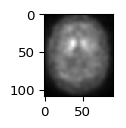

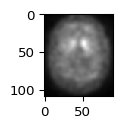

In [37]:
#import statements 
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import imageio

#set instance variables
path_pd = "/Users/anacismaru/asr_mac/pd"
path_control = "/Users/anacismaru/asr_mac/control"
PX_SIZE_2D = 64
PX_SIZE_3D = 64

#matrices that contain numpy arrays of pixel data
images_pd = upload_dicom(path_pd)
images_control = upload_dicom(path_control)
ia.imshow(images_pd[0][45])

flipped_pd = flip(images_pd)
flipped_control = flip(images_control)
ia.imshow(flipped_pd[0][45])




In [14]:
#checked and good
def upload_dicom(path):
    PathDicom = path
    lstFilesDCM = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicom):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM.append(os.path.join(dirName,filename))
    #print(lstFilesDCM[0])   

    #make a array to store all the 3D dicom images, should be 702 long by the end of the program
    images = []

    # loop through all the DICOM files
    for filenameDCM in lstFilesDCM:   
        # read the file
        vol = imageio.volread(filenameDCM, 'DICOM')
        images.append(vol)
#         # store the raw image data
#         pixel_data = ds.pixel_array
#         #convert pixel data to numpy array for one image
#         array = pixel_data 
#         #append to larger list of images
#         images.append(array)
    #return array with dicom files
    return images

In [34]:
def flip_2(array_images):
    flipped = []
    for image in array_images:
        flip = image = np.flip(image, axis=2)
        flipped.append(flip)
    return flipped